# "Yes" or "No" Sound Recognition

In [ ]:
import os
import librosa
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split

## Get data from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
!mkdir data
!unzip /content/MyDrive/MyDrive/train.zip -d data

In [ ]:
data_dir = os.path.join(os.curdir, "data")

In [ ]:
def fit_size(signal):
    signal = signal[:54200]
    if len(signal) > 44200:
        signal = signal[len(signal) - 44200:]
    else:
        signal = np.concatenate((signal, np.zeros(44200 - len(signal))))
    return signal

In [ ]:
sound_files = os.listdir(data_dir)
data = []
label_data = []

for sound_name in sound_files:
    path = os.path.join(data_dir, sound_name)
    try:
      signal, sample_rate = librosa.load(path, sr=44100)
      signal = fit_size(signal)
      data.append(signal)
      if 'yes' in sound_name:
          label_data.append(1)
      elif 'no' in sound_name:
          label_data.append(0)
    except:
      pass

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
X = np.array(data)
label_data = np.array(label_data)
Y = to_categorical(label_data)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(479, 44200)
(120, 44200)


## Feature Eraxtion

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
yes_signals = []
no_signals = []

for i in range(len(X)):
  if len(yes_signals) < 6 and Y[i][0] == 1:
    yes_signals.append(X[i]) 
  if len(no_signals) < 6 and Y[i][0] == 0:
    no_signals.append(X[i])
  if len(no_signals) > 6 and len(yes_signals) > 5:
    break

### "Yes" signals

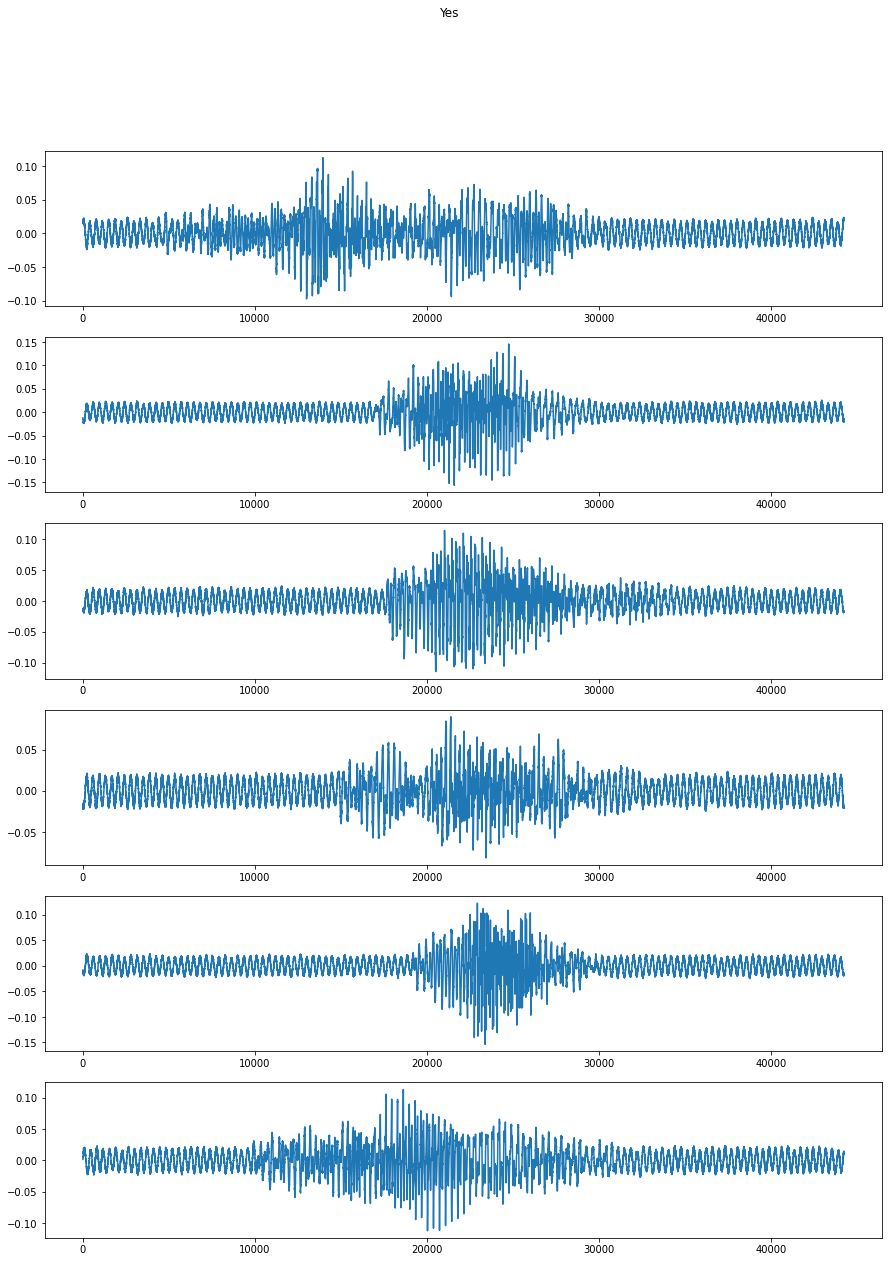

In [ ]:
fig, axs = plt.subplots(6)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.suptitle('Yes')
for i in range(6):
    N = yes_signals[i].shape[0] 
    t = np.linspace(0., N, yes_signals[i].shape[0])
    axs[i].plot(t, yes_signals[i])

(22100,)
(22100,)
(22100,)
(22100,)
(22100,)
(22100,)


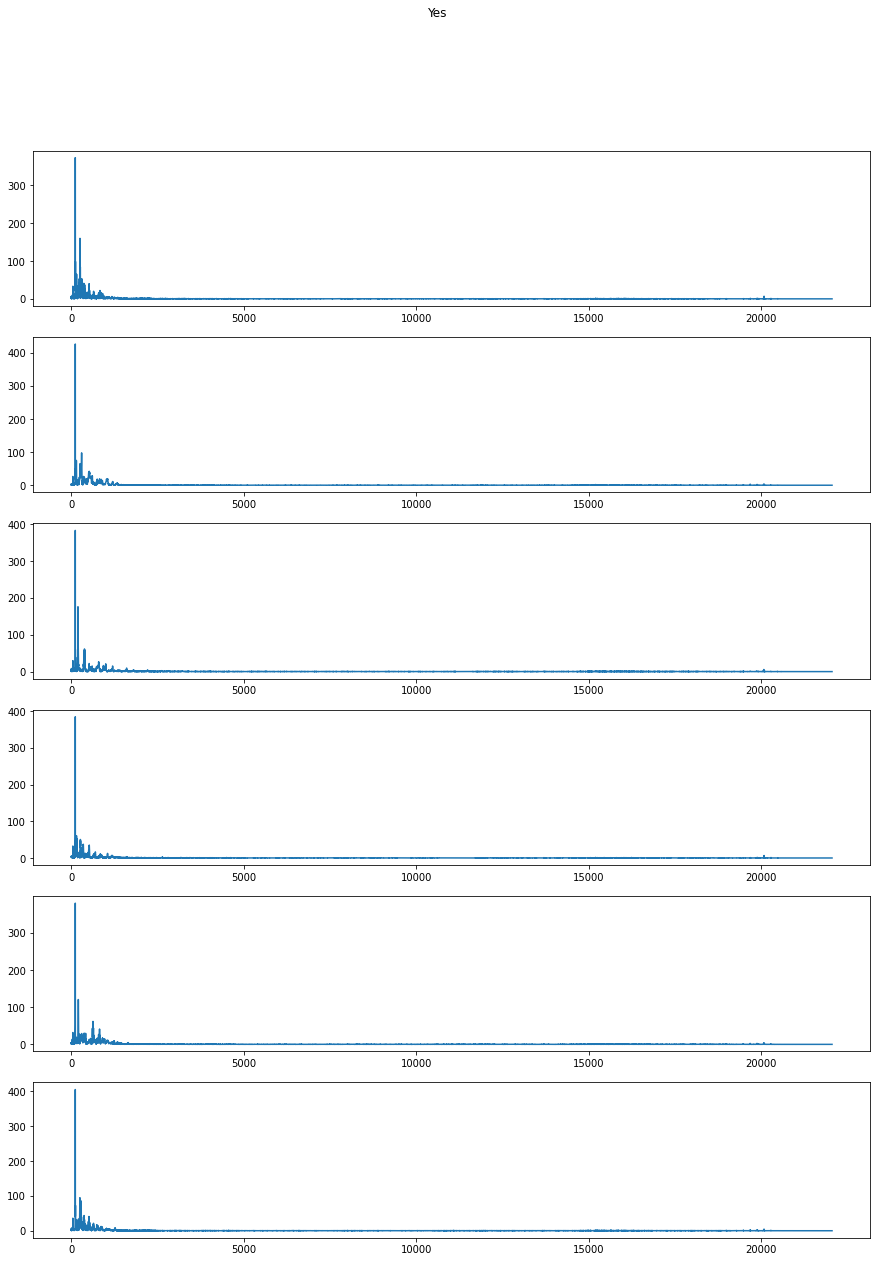

In [ ]:
fig, axs = plt.subplots(6)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.suptitle('Yes')
for i in range(6):
    signal = yes_signals[i]
    f = np.abs(np.fft.fft(signal)) 
    N = len(f)
    xf = np.fft.fftfreq(N, 1/sample_rate)
    f = f[:N//2]
    xf = xf[:N//2]
    print(f.shape)
    axs[i].plot(xf, f)

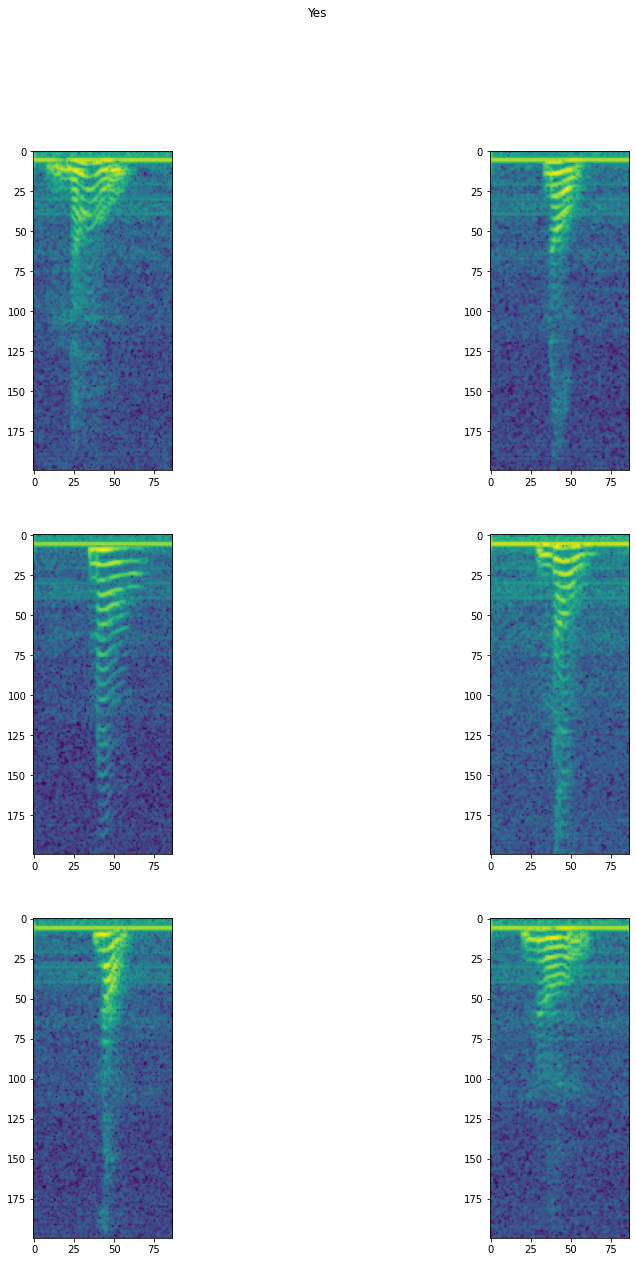

In [ ]:
fig, axs = plt.subplots(3 , 2)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.suptitle('Yes')
for i in range(6):
    signal = yes_signals[i]
    S = librosa.stft(signal)
    S = np.abs(S)
    # librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), sr=sample_rate, x_axis='time', y_axis='mel')
    axs[i//2][i%2].imshow(librosa.amplitude_to_db(S[:200], ref=np.max))

### "No" signals

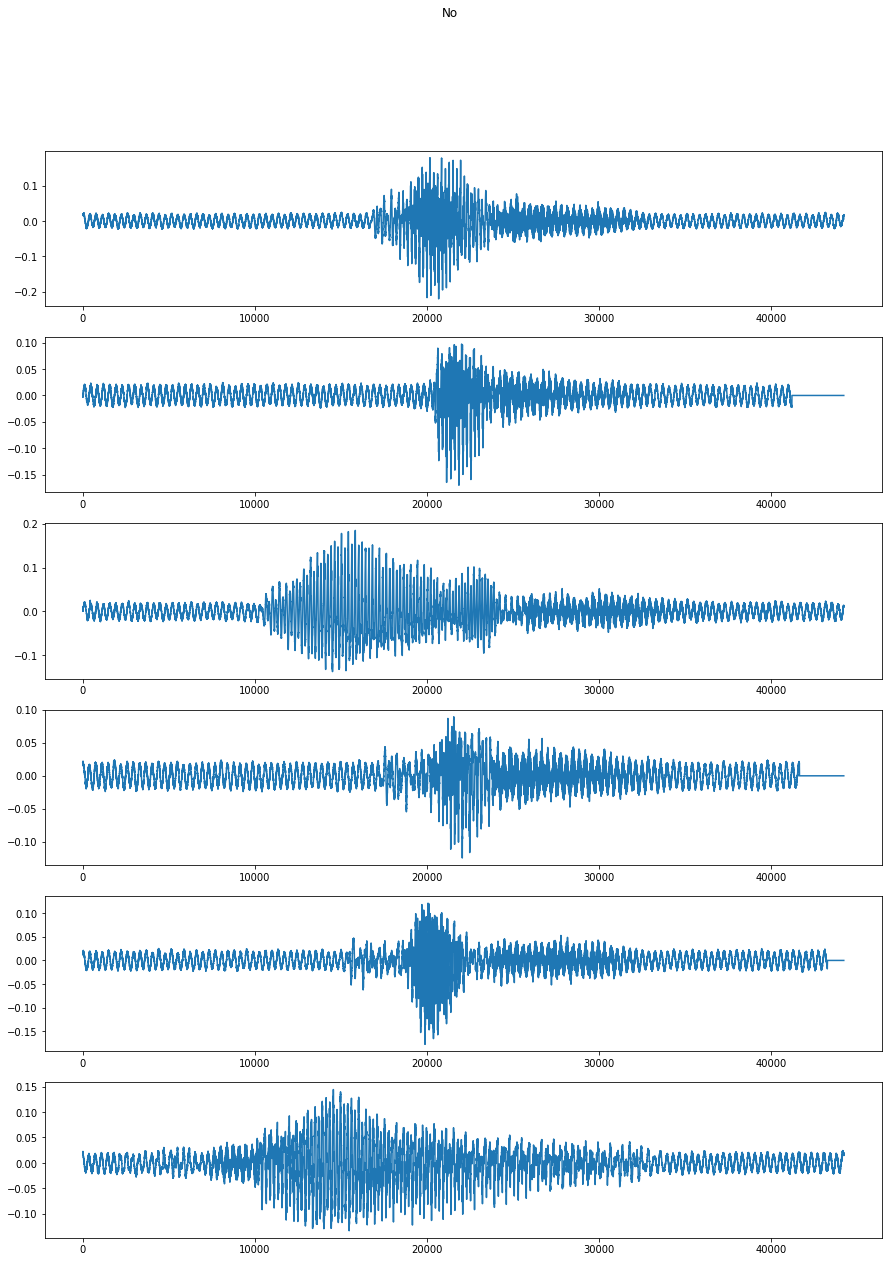

In [ ]:
fig, axs = plt.subplots(6)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.suptitle('No')
for i in range(6):
    N = no_signals[i].shape[0] 
    t = np.linspace(0., N, no_signals[i].shape[0])
    axs[i].plot(t, no_signals[i])

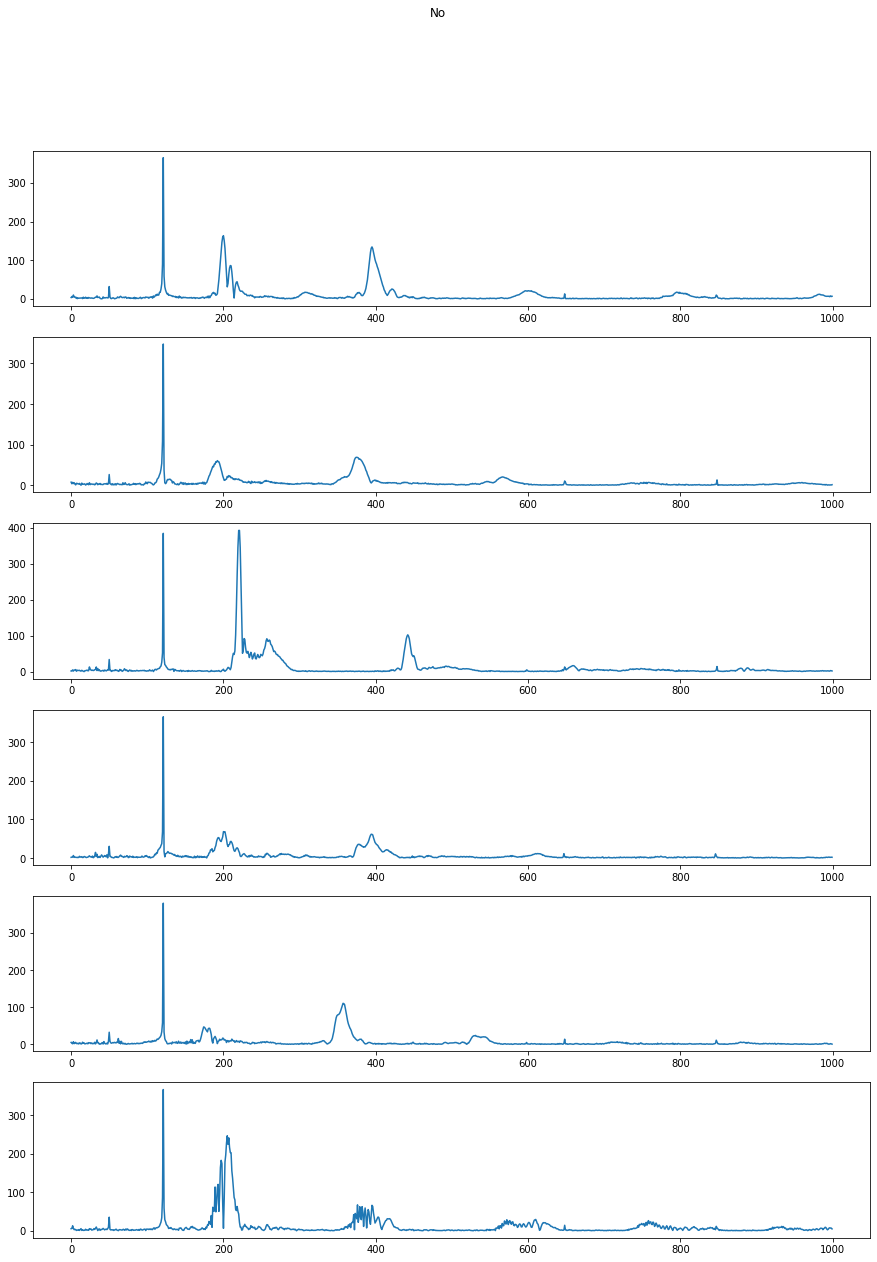

In [ ]:
fig, axs = plt.subplots(6)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.suptitle('No')
for i in range(6):
    signal = no_signals[i][:sample_rate]
    f = np.abs(np.fft.fft(signal)) 
    N = len(f)
    xf = np.fft.fftfreq(N, 1/sample_rate)
    f = f[:N//2]
    xf = xf[:N//2]
    axs[i].plot(xf[:1000], f[:1000])

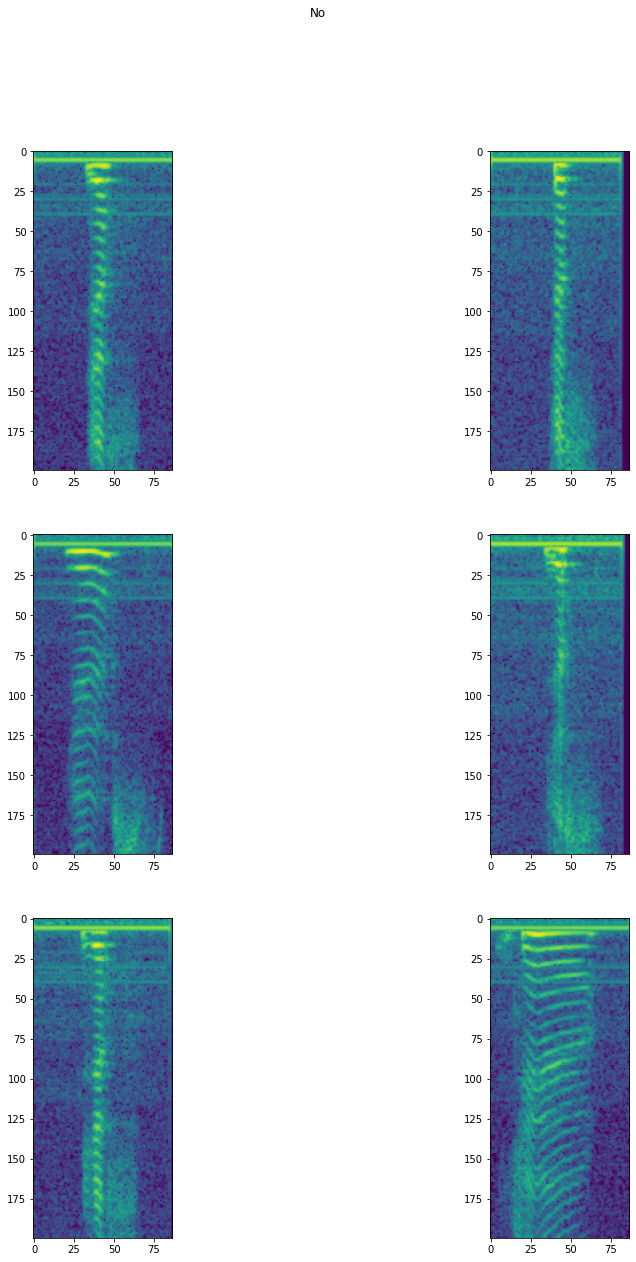

In [ ]:
fig, axs = plt.subplots(3 , 2)
fig.set_figheight(20)
fig.set_figwidth(15)
# fig.suptitle('No')
for i in range(6):
    signal = no_signals[i]
    S = librosa.stft(signal)
    S = np.abs(S)
    # librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), sr=sample_rate, x_axis='time', y_axis='mel')
    axs[i//2][i%2].imshow(librosa.amplitude_to_db(S[:200], ref=np.max))

## Train Model

### Time

In [ ]:
t_x_train = x_train[..., None]
t_x_test = x_test[..., None]
print(t_x_train.shape)
print(t_x_test.shape)

(479, 44200, 1)
(120, 44200, 1)


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=t_x_train[0].shape))
model.add(keras.layers.Conv1D(filters=32, kernel_size=(3), activation='relu'))
model.add(keras.layers.Conv1D(filters=32, kernel_size=(3), activation='relu'))
model.add(keras.layers.Flatten(input_shape=t_x_train[0].shape))
model.add(keras.layers.Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 44198, 32)         128       
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 44196, 32)         3104      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1414272)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2828546   
Total params: 2,831,778
Trainable params: 2,831,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(t_x_train, y_train,
                    epochs=10,
                    validation_data=(t_x_test, y_test),
                    shuffle=True)

Epoch 1/10
15/15 [==============================] - 31s 163ms/step - loss: 0.6895 - accuracy: 0.5992 - val_loss: 0.5883 - val_accuracy: 0.7167
Epoch 2/10
15/15 [==============================] - 2s 116ms/step - loss: 0.5427 - accuracy: 0.7223 - val_loss: 0.5300 - val_accuracy: 0.7417
Epoch 3/10
15/15 [==============================] - 2s 114ms/step - loss: 0.4777 - accuracy: 0.7829 - val_loss: 0.5551 - val_accuracy: 0.7000
Epoch 4/10
15/15 [==============================] - 2s 114ms/step - loss: 0.3678 - accuracy: 0.8643 - val_loss: 0.4950 - val_accuracy: 0.7250
Epoch 5/10
15/15 [==============================] - 2s 114ms/step - loss: 0.2409 - accuracy: 0.9269 - val_loss: 0.4713 - val_accuracy: 0.7667
Epoch 6/10
15/15 [==============================] - 2s 115ms/step - loss: 0.1837 - accuracy: 0.9499 - val_loss: 0.5796 - val_accuracy: 0.7333
Epoch 7/10
15/15 [==============================] - 2s 116ms/step - loss: 0.1093 - accuracy: 0.9729 - val_loss: 0.5503 - val_accuracy: 0.7583
Epoch

### Frequency

In [ ]:
f_x_train = np.abs(np.fft.fft(x_train, axis=1)) 
f_x_test = np.abs(np.fft.fft(x_test, axis=1)) 

In [ ]:
f_x_train = f_x_train[..., None]
f_x_test = f_x_test[..., None]
print(f_x_train.shape)
print(f_x_test.shape)

(479, 44200, 1)
(120, 44200, 1)


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=f_x_test[0].shape))
model.add(keras.layers.Conv1D(filters=32, kernel_size=(3), activation='relu'))
model.add(keras.layers.Conv1D(filters=32, kernel_size=(3), activation='relu'))
model.add(keras.layers.Flatten(input_shape=f_x_test[0].shape))
model.add(keras.layers.Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 44198, 32)         128       
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 44196, 32)         3104      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1414272)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2828546   
Total params: 2,831,778
Trainable params: 2,831,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(f_x_train, y_train,
                    epochs=10,
                    validation_data=(f_x_test, y_test),
                    shuffle=True)

Epoch 1/10
15/15 [==============================] - 2s 134ms/step - loss: 0.7061 - accuracy: 0.9248 - val_loss: 0.0746 - val_accuracy: 0.9833
Epoch 2/10
15/15 [==============================] - 2s 115ms/step - loss: 0.2631 - accuracy: 0.9979 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 2s 113ms/step - loss: 0.0551 - accuracy: 0.9979 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 2s 114ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 2s 114ms/step - loss: 1.2444e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 2s 114ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.00

### STFT

In [ ]:
stft_x_train = []
stft_x_test = []

for i in range(len(x_train)):
  stft_x_train.append(librosa.stft(x_train[i]))

for i in range(len(x_test)):
  stft_x_test.append(librosa.stft(x_test[i]))

stft_x_train = np.array(stft_x_train)
stft_x_test = np.array(stft_x_test)

print(stft_x_train.shape)
print(stft_x_test.shape)

(479, 1025, 87)
(120, 1025, 87)


In [ ]:
stft_x_train = stft_x_train[..., None]
stft_x_test = stft_x_test[..., None]
print(stft_x_train.shape)
print(stft_x_test.shape)

(479, 1025, 87, 1)
(120, 1025, 87, 1)


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=stft_x_train[0].shape))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Flatten(input_shape=stft_x_train[0].shape))
model.add(keras.layers.Dense(units=2, activation='softmax'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 1023, 85, 32)      320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1021, 83, 32)      9248      
_________________________________________________________________
flatten_5 (Flatten)          (None, 2711776)           0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 5423554   
Total params: 5,433,122
Trainable params: 5,433,122
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(stft_x_train, y_train,
                    epochs=10,
                    validation_data=(stft_x_test, y_test),
                    shuffle=True)

Epoch 1/10
15/15 [==============================] - 8s 431ms/step - loss: 0.2343 - accuracy: 0.9040 - val_loss: 0.0405 - val_accuracy: 0.9750
Epoch 2/10
15/15 [==============================] - 4s 273ms/step - loss: 0.0110 - accuracy: 0.9958 - val_loss: 8.9761e-05 - val_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 4s 271ms/step - loss: 0.0031 - accuracy: 0.9979 - val_loss: 4.3677e-05 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 4s 269ms/step - loss: 1.2239e-04 - accuracy: 1.0000 - val_loss: 3.2446e-04 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 4s 269ms/step - loss: 5.9677e-05 - accuracy: 1.0000 - val_loss: 1.2667e-04 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 4s 275ms/step - loss: 1.7445e-05 - accuracy: 1.0000 - val_loss: 4.1015e-05 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 4s 273ms/step - loss: 3.6111e-05 - accuracy: 1.0000 - val_loss: 